### Importing Libraries

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [371]:
import warnings
warnings.filterwarnings('ignore')

### Exploring dataset

In [372]:
data = pd.read_csv('dataset.csv')
data.tail()

,name,ratings,price,imgURL,corpus
2541,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/khglj0w0/mobile/m/t/7/redmi-note-9-m2003j15si-mi-original-imafxgzhx4prwpgq.jpeg?q=70,"Storage64 GBRAM4 GBExpandable Storage512GB SystemAndroid 10Processor TypeMediaTek Helio G85Processor Speed2 48MP 8MP 2MP 2MP 48MP 13MP 4G Capacity5020 Display Size16.59 cm (6.53 inch)Resolution2340 x 1080 PixelsResolution TypeFull HD+GPUArm Mali-G52 clocked up to 1000MHzDisplay TypeFull HD+ DisplayHD Game SupportYesOther Display Features19.5:9 Aspect Ratio, Brightness: 450 nits (Typ), Color Contrast Ratio: 1500:1 (Typ), NTSC: 84% (Typ), TUV Rheinland Low Blue Light Certification, Reading mode 2.0, Full Screen Gestures, Corning Gorilla Glass 5, Splash-proof Nano Coating"
2542,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/9/o/l/-original-imagdh2zh7hbwyxh.jpeg?q=70,Storage128 GBRAM8 SystemAndroid 11Processor Speed2.4 48MP 5G Capacity4500 Display Size16.64 cm (6.55 inch)Resolution2400 x 1080 pixel
2543,Motorola a50,4.1,1549,https://rukminim2.flixcart.com/image/312/312/kw9krrk0/mobile/j/3/w/-original-imag8zgfh9ykggsp.jpeg?q=70,NaN
2544,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 256 GB)",4.3,20463,https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/w/t/r/-original-imaggj68cgtdacxn.jpeg?q=70,Storage256 GBRAM12 SystemAndroid 12Processor TypeOcta CoreProcessor Speed2.99 108MP 12MP 10MP 10MP 108MP 10MP 12MP 10MP 40MP 5G Capacity5000 Display Size17.27 cm (6.8 inch)Resolution3088 x 1440 PixelsResolution TypeQuad HD+GPUQualcomm Adreno 730Display TypeDynamic AMOLED 2X DisplayHD Game SupportYes
2545,"vivo T2x 5G (Aurora Gold, 128 GB)",4.4,13999,https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/c/s/x/-original-imagzjhwaaewgj8r.jpeg?q=70,Storage128 GBRAM6 SystemAndroid 13Processor TypeDimensity 6020Processor Speed2.2 50MP 2MP 50MP 2MP 8MP 8MP 5G Capacity5000 Display Size16.71 cm (6.58 inch)Resolution2408 x 1080 PixelsResolution TypeFull HD+Display TypeFull HD+ LCD Display


### Data Cleaning - removing missing values

In [373]:
# before cleaning
data_size = data.shape
missing_values = data.isnull().sum()
data_size, missing_values

((2546, 5),
 name        0
 ratings     0
 price       0
 imgURL      0
 corpus     12
 dtype: int64)

In [374]:
data = data.dropna()

# after cleaning
data_size = data.shape
missing_values = data.isnull().sum()
data_size, missing_values

((2534, 5),
 name       0
 ratings    0
 price      0
 imgURL     0
 corpus     0
 dtype: int64)

### Feature Extraction

In [375]:
# to extract storage information from corpus
def extract_storage(corpus):
    """Extract the storage capacity from the corpus."""
    storage = re.search(r'Storage(\d+)', corpus)
    if storage:
        return int(storage.group(1))
    return None

# to extract ram information from corpus
def extract_ram(corpus):
    ram = re.search(r'RAM(\d+)', corpus)
    if ram:
        return int(ram.group(1))
    return None

# to extract operating system name from corpus
def extract_os(corpus):
    os = re.search(r'System(.*?)Processor', corpus)
    if os:
        return os.group(1).strip()
    return None

# to extract processor details from corpus
def extract_processor(corpus):
    """Extract the processor type from the corpus."""
    processor = re.search(r'Processor (.*?) ', corpus)
    if processor:
        return processor.group(1).strip()
    return None

# to extract brand name from corpus
def extract_brand(name):
    return name.split()[0]



data['Storage'] = data['corpus'].apply(extract_storage)
data['RAM'] = data['corpus'].apply(extract_ram)
data['OS'] = data['corpus'].apply(extract_os)
data['Processor'] = data['corpus'].apply(extract_processor)
data['Brand'] = data['name'].apply(extract_brand)

data.tail()


,name,ratings,price,imgURL,corpus,Storage,RAM,OS,Processor,Brand
2540,"SAMSUNG Galaxy S20 FE 5G (Cloud Navy, 128 GB)",4.2,27440,https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/a/m/w/-original-imag47fdfgmg2gnh.jpeg?q=70,Storage128 GBRAM8 SystemAndroid 10Processor Speed2.73 12MP 5G Capacity4500 Display Size16.51 cm (6.5 inch)Resolution2400 x 1080 Pixels,128.0,8.0,Android 10,Speed2.73,SAMSUNG
2541,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/khglj0w0/mobile/m/t/7/redmi-note-9-m2003j15si-mi-original-imafxgzhx4prwpgq.jpeg?q=70,"Storage64 GBRAM4 GBExpandable Storage512GB SystemAndroid 10Processor TypeMediaTek Helio G85Processor Speed2 48MP 8MP 2MP 2MP 48MP 13MP 4G Capacity5020 Display Size16.59 cm (6.53 inch)Resolution2340 x 1080 PixelsResolution TypeFull HD+GPUArm Mali-G52 clocked up to 1000MHzDisplay TypeFull HD+ DisplayHD Game SupportYesOther Display Features19.5:9 Aspect Ratio, Brightness: 450 nits (Typ), Color Contrast Ratio: 1500:1 (Typ), NTSC: 84% (Typ), TUV Rheinland Low Blue Light Certification, Reading mode 2.0, Full Screen Gestures, Corning Gorilla Glass 5, Splash-proof Nano Coating",64.0,4.0,Android 10,TypeMediaTek,REDMI
2542,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/9/o/l/-original-imagdh2zh7hbwyxh.jpeg?q=70,Storage128 GBRAM8 SystemAndroid 11Processor Speed2.4 48MP 5G Capacity4500 Display Size16.64 cm (6.55 inch)Resolution2400 x 1080 pixel,128.0,8.0,Android 11,Speed2.4,OnePlus
2544,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 256 GB)",4.3,20463,https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/w/t/r/-original-imaggj68cgtdacxn.jpeg?q=70,Storage256 GBRAM12 SystemAndroid 12Processor TypeOcta CoreProcessor Speed2.99 108MP 12MP 10MP 10MP 108MP 10MP 12MP 10MP 40MP 5G Capacity5000 Display Size17.27 cm (6.8 inch)Resolution3088 x 1440 PixelsResolution TypeQuad HD+GPUQualcomm Adreno 730Display TypeDynamic AMOLED 2X DisplayHD Game SupportYes,256.0,12.0,Android 12,TypeOcta,SAMSUNG
2545,"vivo T2x 5G (Aurora Gold, 128 GB)",4.4,13999,https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/c/s/x/-original-imagzjhwaaewgj8r.jpeg?q=70,Storage128 GBRAM6 SystemAndroid 13Processor TypeDimensity 6020Processor Speed2.2 50MP 2MP 50MP 2MP 8MP 8MP 5G Capacity5000 Display Size16.71 cm (6.58 inch)Resolution2408 x 1080 PixelsResolution TypeFull HD+Display TypeFull HD+ LCD Display,128.0,6.0,Android 13,TypeDimensity,vivo


In [377]:
# Check the unique values for 'System' and 'Processor'
# all_os = data['OS'].unique()
# all_processors = data['Processor'].unique()

# all_os, all_processors

### Data Normalization

In [378]:
# to normalize operating system names
def normalize_os(os):
    if pd.isnull(os):
        return None
    if 'android' in os.lower():
        return 'Android'
    if 'ios' in os.lower():
        return 'iOS'
    if 'tizen' in os.lower():
        return 'Tizen'
    if 'series 30' in os.lower():
        return 'Series 30'
    return 'Other'


data['OS'] = data['OS'].apply(normalize_os)

all_os = data['OS'].unique()

all_os


array(['Android', 'iOS', None, 'Other', 'Series 30', 'Tizen'],
      dtype=object)

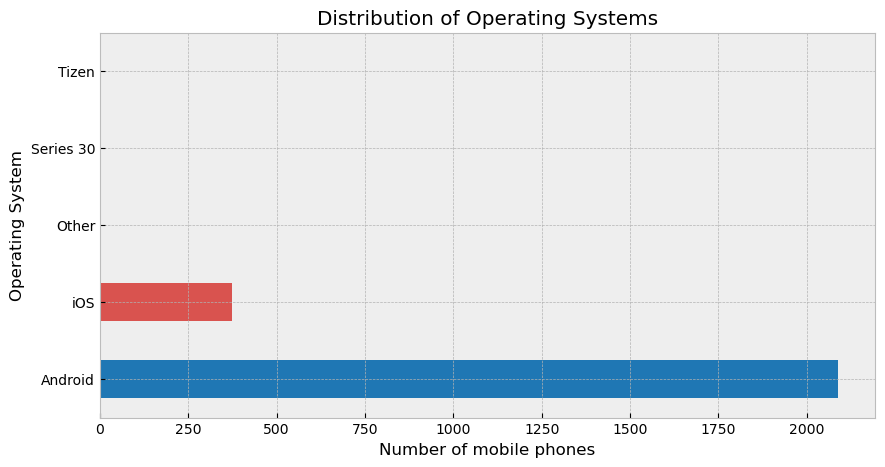

In [379]:
# operating system visualization
data['OS'].value_counts().plot(kind = 'barh', rot=0, figsize=(10, 5), color=['#1f77b4', '#d9534f', '#5cb85c'])
plt.title('Distribution of Operating Systems')
plt.xlabel('Number of mobile phones')
plt.ylabel('Operating System')
plt.show()

In [383]:
# to normalize processor names
def normalize_processor(processor):
    if pd.isnull(processor):
        return None
    if 'mediatek' in processor.lower():
        return 'MediaTek'
    if 'mtk' in processor.lower():
        return 'MediaTek'
    if 'qualcomm' in processor.lower():
        return 'Qualcomm'
    if 'sdm' in processor.lower():
        return 'Qualcomm'
    if 'Snapdragon' in processor.lower():
        return 'Qualcomm'
    if 'apple' in processor.lower():
        return 'Apple'
    if 'samsung' in processor.lower():
        return 'Samsung'
    if 'exynos' in processor.lower():
        return 'Samsung'
    return 'Other'


data['Processor'] = data['Processor'].apply(normalize_processor)

# Check the unique values for 'Processor'
all_processor = data['Processor'].unique()

all_processor

array(['MediaTek', 'Other', 'Qualcomm', None, 'Samsung', 'Apple'],
      dtype=object)

### Data Visualization

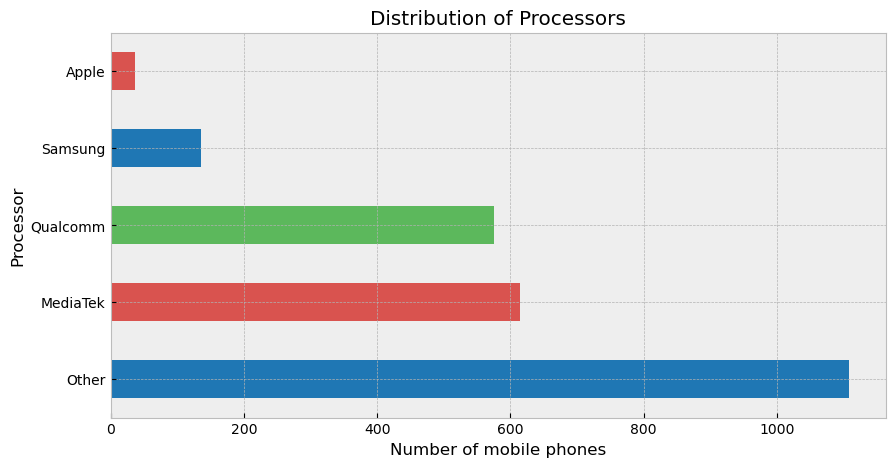

In [384]:
# processor visualization
data['Processor'].value_counts().plot(kind = 'barh', rot=0, figsize=(10, 5), color=['#1f77b4', '#d9534f', '#5cb85c'])
plt.title('Distribution of Processors')
plt.xlabel('Number of mobile phones')
plt.ylabel('Processor')
plt.show()

In [392]:
def remove_dollar(price):
    price2 = re.sub(r'\D', '', str(price))
    try:
        return int(price2)
    except ValueError:
        return None

data['price'] = data['price'].apply(remove_dollar)

# Check the first few rows of the DataFrame
data.head()

,name,ratings,price,imgURL,corpus,Storage,RAM,OS,Processor,Brand
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/b/r/f/-original-imaghkvuhzwge3za.jpeg?q=70,"Storage128 GBRAM6 SystemAndroid 12Processor TypeMediatek Dimensity 1080Processor Speed2.6 50MP 8MP 2MP 50MP 16MP 5G Capacity5000 Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+ AMOLED DisplayGPUARM Mali-G68 MC4Display TypeFull HD+ AMOLED DisplayOther Display FeaturesRefresh Rate: 120 Hz, Contrast: 5,000,000:1, 1920Hz PWM Dimming, Brightness Level: 16000:1, Peak Brightness: 900 nits",128.0,6.0,Android,MediaTek,REDMI
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k01b8280pkrrdj/mobile-refurbished/8/w/n/f11-pro-128-d-cph1969-oppo-6-original-imafec8hzfzyg79e.jpeg?q=70,"Storage128 GBRAM6 GBExpandable Storage256GB SystemAndroid Pie 9.0Processor TypeMediaTek Helio P70 Octa Core 2.1 GHzProcessor Speed2.1 48MP 5MP 48MP 5MP 48MP 5MP 48MP 5MP 48MP 5MP 16MP 3G Capacity4000 Display Size16.51 cm (6.5 inch)Resolution2340 x 1080 pixelsResolution TypeFull HD+GPUARM Mali-G72 MP3 at 900 MHzDisplay Colors16MOther Display FeaturesScreen Texture: TFT-LTPS, In-cell Touch Panel Technology, Narrow Frame: 1.70mm (Size from AA to Outside Edge of Glass), Screen Ratio: 90.90%, Screen Contrast: 1500:1 (Typical), Color Saturation: NTSC 81.5% (Typical), Maximum Brightness: 480 nits (Typical), Touch Screen Supplier: DSBJ, TM, Touch Panel Glass Type: Dragontrail",128.0,6.0,Android,MediaTek,OPPO
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/m/e/y/-original-imagbgaqje2mygjm.jpeg?q=70,Storage64 GBRAM4 SystemAndroid 11Processor Speed2.4 50MP 4G Capacity5000 Display Size16.33 cm (6.43 inch)Resolution2400 x 1080 pixel,64.0,4.0,Android,Other,REDMI
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/x/t/k/-original-imag43fz8bd4hg3d.jpeg?q=70,Storage256 GBRAM12 SystemAndroid Q 11Processor TypeQualcomm Snapdragon Octa Core 750G 5G ProcessorProcessor Speed2.4 64MP 5G Capacity4500 Display Size16.33 cm (6.43 inch)Resolution2400 x 1080$$pixelsDisplay TypeFluid Amoled Display,256.0,12.0,Android,Qualcomm,OnePlus
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/ktketu80/mobile/a/i/l/iphone-13-mini-mlk93hn-a-apple-original-imag6vp6x67yypzk.jpeg?q=70,"Storage128 SystemiOS 15Processor TypeA15 Bionic Chip 12MP 12MP 12MP 63MP 12MP 12MP 5G notMentioned Display Size13.72 cm (5.4 inch)Resolution2340 x 1080 PixelsResolution TypeSuper Retina XDR DisplayDisplay TypeSuper Retina XDR DisplayOther Display FeaturesSuper Retina XDR Display, 5.4‑inch (Diagonal) All‑screen OLED Display, HDR Display, True Tone, Wide Colour (P3), Haptic Touch, 20,00,000:1 Contrast Ratio (Typical), 800 nits max Brightness (Typical), 1,200 nits max Brightness (HDR), Fingerprint-resistant Oleophobic Coating, Support for Display of Multiple Languages and Characters Simultaneously",128.0,NaN,iOS,Other,APPLE


In [393]:
def normalize_brand(brand):
    if pd.isnull(brand):
        return None
    if 'xiaomi' in brand.lower():
        return 'Xiaomi'
    if 'redmi' in brand.lower():
        return 'Xiaomi'
    if 'mi' in brand.lower():
        return 'Xiaomi'
    if 'oppo' in brand.lower():
        return 'OPPO'
    if 'oneplus' in brand.lower():
        return 'OnePlus'
    if 'apple' in brand.lower():
        return 'Apple'
    if 'samsung' in brand.lower():
        return 'Samsung'
    if 'vivo' in brand.lower():
        return 'Vivo'
    if 'moto' in brand.lower():
        return 'Motorola'
    if 'motorola' in brand.lower():
        return 'Motorola'
    if 'infinix' in brand.lower():
        return 'Infinix'
    return 'Other'


data['Brand'] = data['Brand'].apply(normalize_brand)

all_brand = data['Brand'].unique()
all_brand

array(['Xiaomi', 'OPPO', 'OnePlus', 'Apple', 'Infinix', 'Samsung', 'Vivo',
       'Motorola', 'Other'], dtype=object)

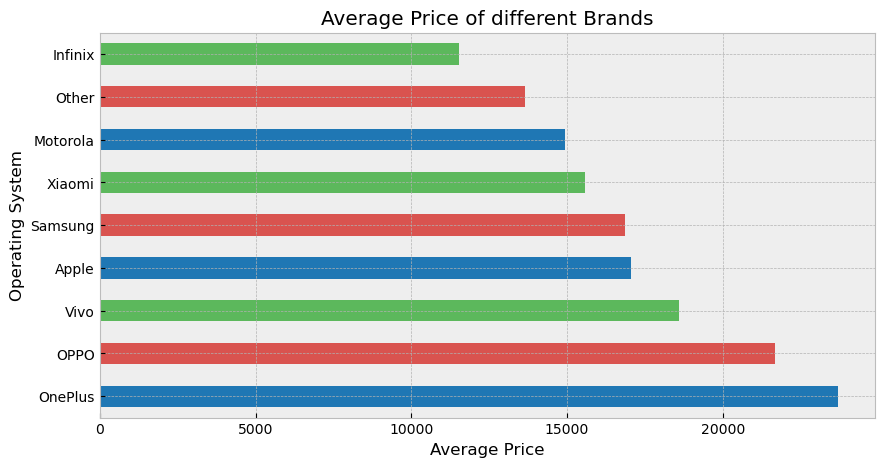

In [394]:
# Brand vs price visualization
avg = data.groupby('Brand')['price'].mean()
avg = avg.sort_values(ascending=False)
# plt.figure(figsize=(10, 6))
avg.plot(kind = 'barh', rot=0, figsize=(10, 5), color=['#1f77b4', '#d9534f', '#5cb85c'])
plt.title('Average Price of different Brands')
plt.xlabel('Average Price')
plt.ylabel('Operating System')
plt.show()

### Data Mining

In [397]:
# to find the list of all suitable mobile phones
def find_mobiles(brand, storage, min_price, max_price):
#     print('start2', brand, os, min_price, max_price)
    filtered_list = data[(data['Brand'] == brand) & (data['Storage'] == storage) & 
    (data['price'] >= min_price) & (data['price'] <= max_price)]
    return filtered_list.sort_values(by='ratings', ascending=False).head(10)


list = find_mobiles(brand='Samsung', storage=128.0, min_price=6000, max_price=55000)
# list = find_mobiles(brand='Samsung', ram=8.0, storage=128.0, min_price=6000, max_price=55000)
# list

In [398]:
from ipywidgets import interact
from IPython.display import clear_output
def update_list():
    global list
    list = find_mobiles(brand=brand2, storage=storage2,  min_price=min_p, max_price=max_p)
#     list
#     print('hey')

brand2=""
ram2=""
storage2=""
min_p=0
max_p=0
def func_brand(Brand):
    global brand2
    brand2=Brand
#     print(brand2)
    update_list()
    
def func_storage(Storage):
    global storage2
    storage2=Storage
    update_list()
#     print(os)


def func_min_price(min_price):
    global min_p
    min_p=min_price
    update_list()
#     print(min_p)

def func_max_price(max_price):
    global max_p
    max_p=max_price
    update_list()
#     print(max_p)

a  = interact(func_brand, Brand=['Samsung', 'Apple', 'Xiaomi', 'Motorola', 'Vivo', 'OPPO', 'Infinix', 'OnePlus' 'Others'])
e  = interact(func_storage, Storage=[2.0, 4.0, 6.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0])
# b  = interact(func_ram, Ram=[1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 32.0, 64.0])
c = interact(func_min_price, min_price=(2000,10000));
d = interact(func_max_price, max_price=(10000,100000));
update_list()

import ipywidgets as widgets


button = widgets.Button(description="Recommend")
output = widgets.Output()

display(button, output)

@output.capture()
def on_button_clicked(b):
    global list
    clear_output(wait=True)
    print('Top 10 recommendations:- ')
    i=1
    for ind in list.index:
        print(f"{i}. {list['name'][ind]} at ₹{list['price'][ind]} - ({list['ratings'][ind]})")
        i=i+1
    b.icon="warning"

button.on_click(on_button_clicked)

interactive(children=(Dropdown(description='Brand', options=('Samsung', 'Apple', 'Xiaomi', 'Motorola', 'Vivo',…

interactive(children=(Dropdown(description='Storage', options=(2.0, 4.0, 6.0, 8.0, 16.0, 32.0, 64.0, 128.0, 25…

interactive(children=(IntSlider(value=6000, description='min_price', max=10000, min=2000), Output()), _dom_cla…

interactive(children=(IntSlider(value=55000, description='max_price', max=100000, min=10000), Output()), _dom_…

Button(description='Recommend', style=ButtonStyle())

Output()